#  Detect outliers
Script to understand a few thing about outlier detection

- If a data distribution is approximately normal then about 68% of the data values lie within one standard deviation of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations.
- If you have any data point that is more than 3 or 2 times the standard deviation, then those points are very likely to be anomalous or outliers.
- Z-score → (also known as the standard score) quantifies how many standard deviations a data point is away from the mean of the dataset. It's a way to standardize and normalize data, making it easier to compare values from different distributions.
$$Z=\frac{X−\mu}{\sigma}$$

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import zscore

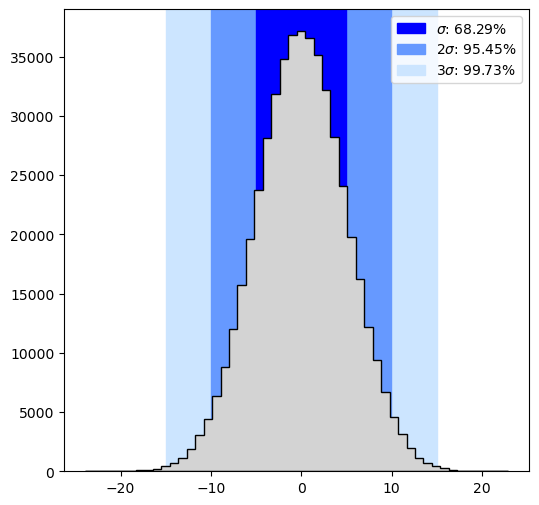

In [3]:
np.random.seed(3)

data = np.random.randn(500000)*5
z_scores = zscore(data)
data_std = data.std()

data_filt_one_std = len(data[abs(z_scores) <= 1])/len(data)
data_filt_two_std = len(data[abs(z_scores) <= 2])/len(data)
data_filt_three_std = len(data[abs(z_scores) <= 3])/len(data)

f, ax = plt.subplots(figsize=(6, 6))
ax.hist(data, bins=50, histtype='stepfilled', edgecolor='black', color='lightgrey')
ax.axvspan(-data_std*1, data_std*1, color='#0000FF', zorder=-1, label=f'$\sigma$: {data_filt_one_std:.2%}')
ax.axvspan(-data_std*2, data_std*2, color='#6699FF', zorder=-2, label=f'$2\sigma$: {data_filt_two_std:.2%}')
ax.axvspan(-data_std*3, data_std*3, color='#CCE5FF', zorder=-3, label=f'$3\sigma$: {data_filt_three_std:.2%}')
plt.legend(loc=1)
plt.show()

[Back to top](#Detect-outliers)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

Q1: 0.32 | Q3: 1.14 | IQR: 0.83


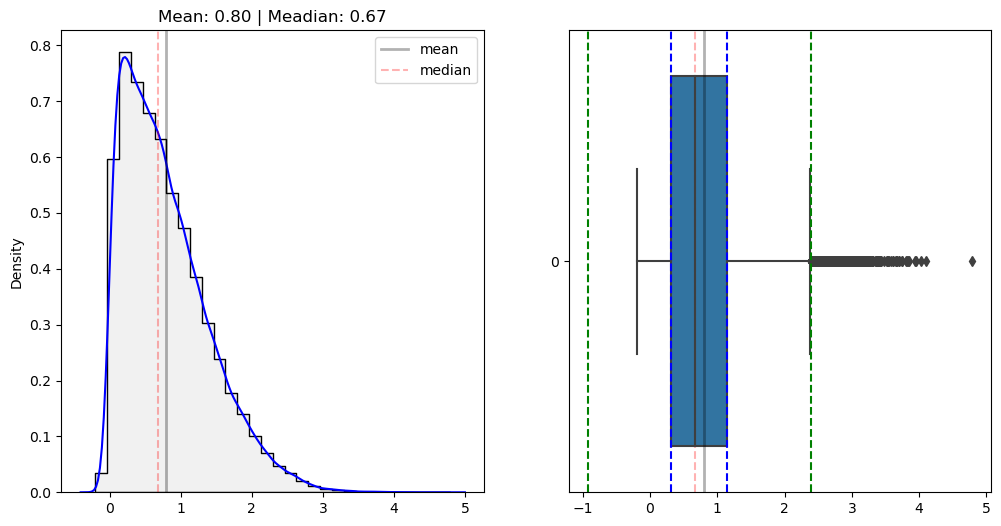

In [60]:
data = skewnorm.rvs(20, size=50000)
# data = np.random.normal(loc=0, scale=1, size=50000)

mean = data.mean()
median = np.median(data)

Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

print(f'Q1: {Q1:.2f} | Q3: {Q3:.2f} | IQR: {IQR:.2f}')

f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
sns.histplot(data, bins=30, kde=False, ax=ax1, element='step', color="lightgray", edgecolor="black", alpha=0.3, stat="density")
sns.kdeplot(data, color="blue", ax=ax1)
sns.boxplot(data=data, orient='h', ax=ax2)

ax1.axvline(x=mean, color = "black", label='mean', linewidth=2, alpha=0.3)
ax1.axvline(x=median, color = 'red', linestyle='--', label='median', alpha=0.3)

ax2.axvline(x=median, color = 'red', linestyle='--', alpha=0.3)
ax2.axvline(x=mean, color = "black", linewidth=2, alpha=0.3)
ax2.axvline(Q1, color = 'b', linestyle='--')
ax2.axvline(Q3, color = 'b', linestyle='--')
ax2.axvline(np.percentile(data, 25)- 1.5 * IQR, color = 'g', linestyle='--')
ax2.axvline(Q3+1.5*IQR, color = 'g', linestyle='--')

ax1.set_title(f'Mean: {mean:.2f} | Meadian: {median:.2f}')

ax1.legend()
plt.show()